# Visualisierungen 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from tabulate import tabulate

In [2]:
# trainierte (ausgerichtete) Modelle laden

w2v_bc = Word2Vec.load(os.path.join('../trained_models', 'w2v_bc_covidvoc.model'))
w2v_ac_al = Word2Vec.load(os.path.join('../trained_models', 'w2v_ac_al_covidvoc.model'))

In [3]:
# Hilfsfunktion zum Plotten ähnlicher Wörter im Vektorraum

def plot_closest_words(model, word, plot_style, filepath):    
    """
    plots most similar words in vector space
    """
    
    arr = np.empty((0,300), dtype='f') 
    closest_words = model.wv.similar_by_word(word)
    word_labels = [word]
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    
    for wrd_score in closest_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
                
    plt.figure(figsize=[12,6])
    plt.style.use(plot_style)
                    
    tsne = TSNE(perplexity=50, n_components=2, init='pca', n_iter=3500, random_state=42)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', color='black')
        
    if filepath != ' ':
        plt.savefig(filepath, bbox_inches='tight')    
    
    plt.show() 

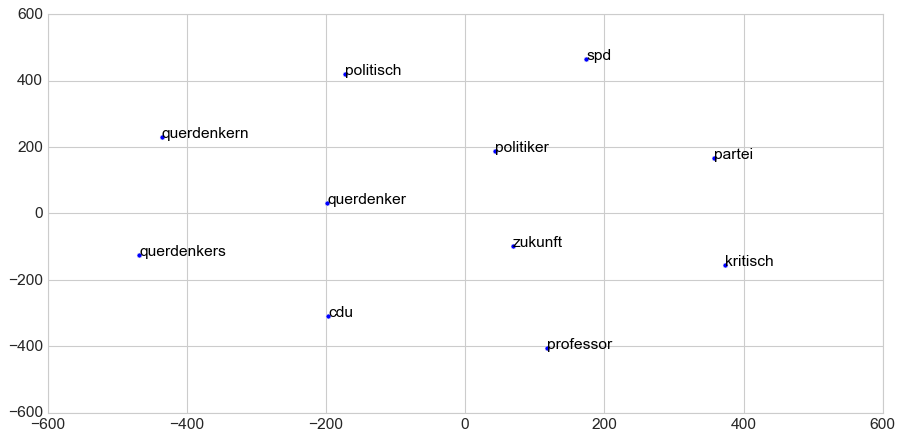

In [8]:
plot_closest_words(w2v_bc, 'querdenker', 'seaborn-whitegrid', ' ') # vor Corona

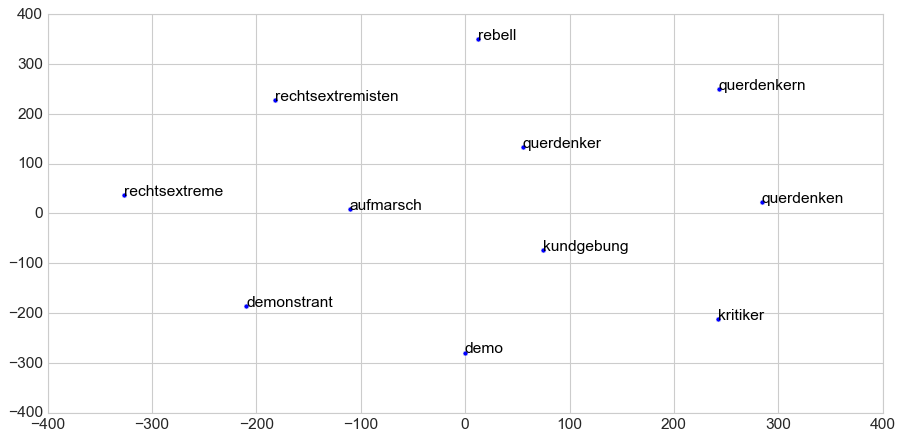

In [9]:
plot_closest_words(w2v_ac_al, 'querdenker', 'seaborn-whitegrid', ' ') # nach Corona

In [10]:
# Hilfsfunktion zum Plotten und Vergleichen ähnlicher Wörter im Vektorraum zweier Modelle

def compare_plot_closest_words(model1, model2, word, plot_style, filepath):    
    """
    plots most similar words in vector space from two models
    """
    
    arr = np.empty((0,300), dtype='f') 
    closest_words1 = model1.wv.similar_by_word(word)
    closest_words2 = model2.wv.similar_by_word(word)
    word_labels1 = [word]
    word_labels2 = [word]
    arr1 = np.append(arr, np.array([model1.wv[word]]), axis=0)
    arr2 = np.append(arr, np.array([model2.wv[word]]), axis=0)
    
    for wrd_score in closest_words1:
        wrd_vector = model1.wv[wrd_score[0]]
        word_labels1.append(wrd_score[0])
        arr1 = np.append(arr1, np.array([wrd_vector]), axis=0)
        
    for wrd_score in closest_words2:
        wrd_vector = model2.wv[wrd_score[0]]
        word_labels2.append(wrd_score[0])
        arr2 = np.append(arr2, np.array([wrd_vector]), axis=0)
        
        
    plt.figure(figsize=[12,8])
    plt.style.use(plot_style)
                    
    tsne = TSNE(perplexity=40, n_components=2, init='pca', n_iter=3500, random_state=42)
    np.set_printoptions(suppress=True)
    
    Y = tsne.fit_transform(arr1)
    Z = tsne.fit_transform(arr2)

    x_coords1 = Y[:, 0]
    y_coords1 = Y[:, 1]
    
    x_coords2 = Z[:, 0]
    y_coords2 = Z[:, 1]
    
    plt.scatter(x_coords1, y_coords1)
    plt.scatter(x_coords2, y_coords2)

    for label, x, y in zip(word_labels1, x_coords1, y_coords1):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', color='grey')
    
    for label, x, y in zip(word_labels2, x_coords2, y_coords2):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', color='black')
        
            
    if filepath != ' ':
        plt.savefig(filepath, bbox_inches='tight')  
           
    plt.show() 

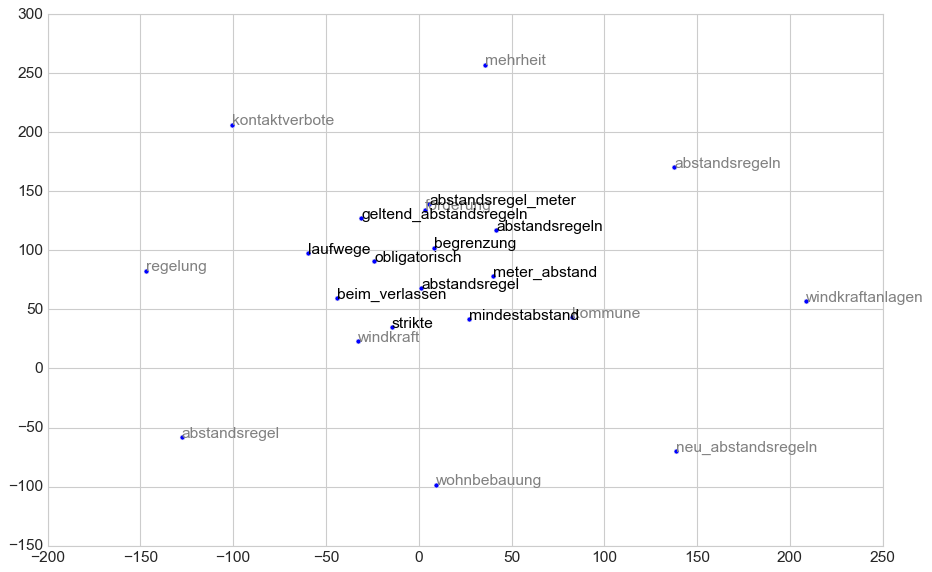

In [11]:
compare_plot_closest_words(w2v_bc, w2v_ac_al, 'abstandsregel', 'seaborn-whitegrid', '../plots/SimilarWords_Abstandsregel.png')

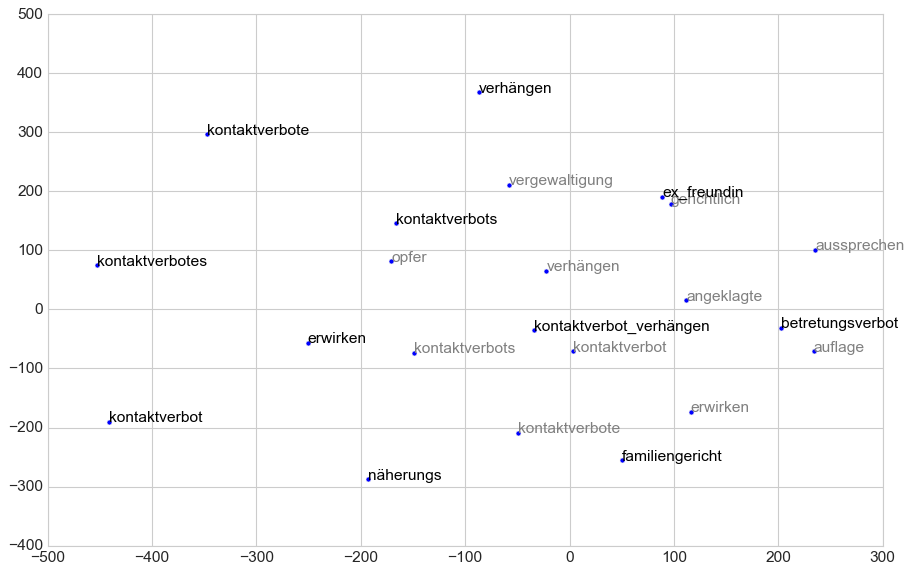

In [12]:
compare_plot_closest_words(w2v_bc, w2v_ac_al, 'kontaktverbot', 'seaborn-whitegrid', '../plots/SimilarWords_Kontaktverbot.png')

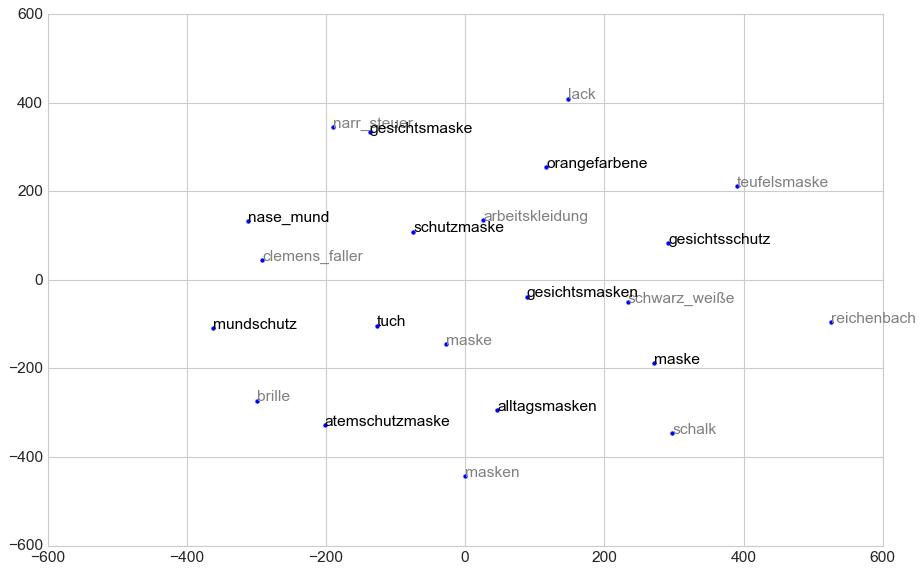

In [13]:
compare_plot_closest_words(w2v_bc, w2v_ac_al, 'maske', 'seaborn-whitegrid', '../plots/SimilarWords_Maske.png')

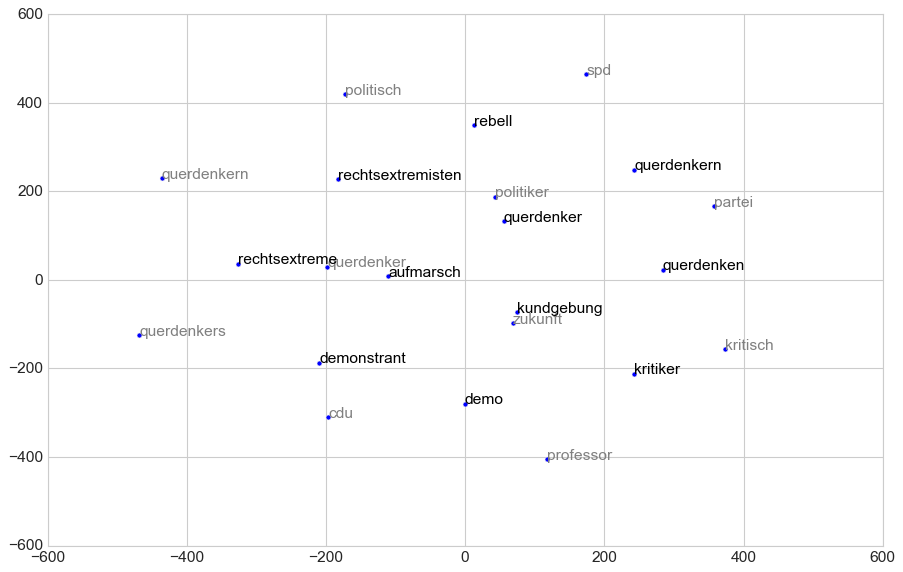

In [14]:
compare_plot_closest_words(w2v_bc, w2v_ac_al, 'querdenker', 'seaborn-whitegrid', '../plots/SimilarWords_Querdenker.png')

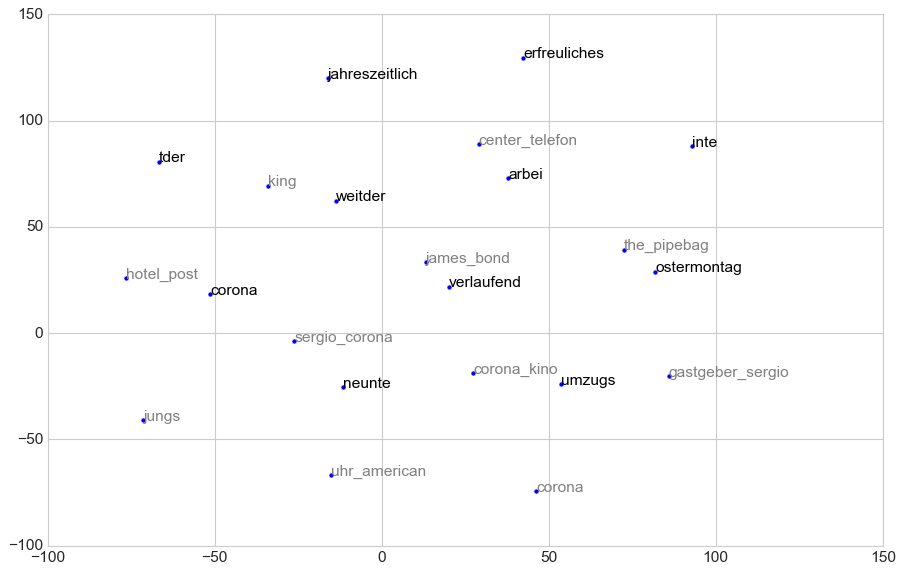

In [15]:
compare_plot_closest_words(w2v_bc, w2v_ac_al, 'corona', 'seaborn-whitegrid', '../plots/SimilarWords_Corona.png')